# Libraries

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix # Fonction qui affiche les corrélations entre variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

# Data

In [ ]:
df_train = pd.read_csv("kaggle_train_set.csv")

X_train = df_train.drop(columns='SalePrice')
y_train = df_train['SalePrice']

X_test = pd.read_csv("kaggle_test_set.csv")

In [44]:
with open("description_variables.txt", "r") as f:
    print(f.read())

• OverallQual : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)
• GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.
• TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.
• 1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.
• YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.
• YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.
• GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.
• GarageArea : Taille du garage en pieds carrés.
• FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.
• TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.
• KitchenQual : Qualité de la 

# I. Fondamental Analysis

# II. Exploratory Data Analysis - EDA

**Form analysis**
- **Identify the target:** SalePrice
- **Nombre of rows ans columns :** (1180, 16)
- **Type of variable:** (8 Discretes and 7 Continuons) / (12 Numerics and 3 Categorical)
  - **discrete Variables:** OverallQual, GarageCars, FullBath, TotRmsAbvGrd, KitchenQual, Fireplaces, Neighborhood, ExterQual
  - **continuos variables:** GrLivArea, TotalBsmtSF, 1stFlrSF, YearBuilt, YearRemodAdd, GarageArea, LotArea
- **Identify missing values:** no missing values

**Content analysis**
- **Visualize the target:** [34000, 755000], distribution asymétrique, prix moyenne 180000$
- **Understand different variables:**
    - Numeric Variables
        - Les variables ont des échelles très différentes --> Penser à normaliser les variables !
        - Beaucoup d'histogramme des variables sont asymétrique, certaine algorithmes de ML peuvent avoir d'avantage du mal à détecter la structure des données de ce type  --> Penser à tranformer les données pour obtenir une distribution plus proche d'une courbe en cloche !

    - Categorical Variables
        - La plupart des maisons possèdent une cuisine et un matériau extérieur de qualité moyenne ou bonne (Typical Or Good)
        - Une bonne partie des maisons (200/1180) sont présentent dans le quartier *NAmes*
- **Visualize features-target relationship:** *OverallQual* et *GrLivArea* sont les deux variables les plus corrélées à variable *SalePrice*
   

## Form analysis

In [142]:
df = df_train.copy()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1180 non-null   int64 
 1   GrLivArea     1180 non-null   int64 
 2   TotalBsmtSF   1180 non-null   int64 
 3   1stFlrSF      1180 non-null   int64 
 4   YearBuilt     1180 non-null   int64 
 5   YearRemodAdd  1180 non-null   int64 
 6   GarageCars    1180 non-null   int64 
 7   GarageArea    1180 non-null   int64 
 8   FullBath      1180 non-null   int64 
 9   TotRmsAbvGrd  1180 non-null   int64 
 10  KitchenQual   1180 non-null   object
 11  Fireplaces    1180 non-null   int64 
 12  LotArea       1180 non-null   int64 
 13  Neighborhood  1180 non-null   object
 14  ExterQual     1180 non-null   object
 15  SalePrice     1180 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 147.6+ KB


In [68]:
df.dtypes.value_counts()

int64     13
object     3
Name: count, dtype: int64

<Axes: >

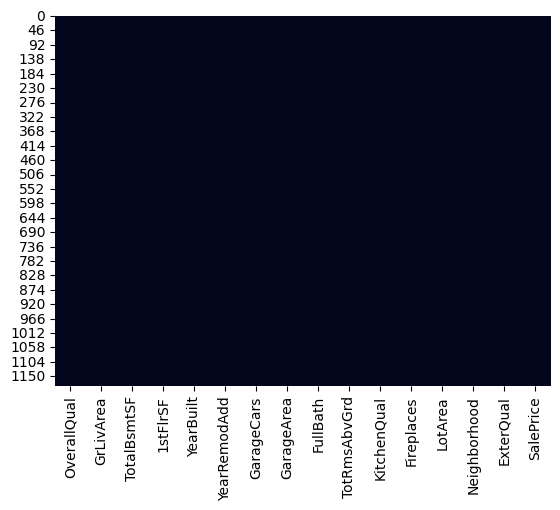

In [ ]:
sns.heatmap(df.isna(), cbar=False)

## Content Analysis
**numerics Variables**

In [80]:
df.describe()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,SalePrice
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,6.095763,1508.277966,1058.874576,1163.179661,1970.688983,1984.511017,1.752542,468.944915,1.552542,6.486441,0.609322,10448.989831,179822.169492
std,1.383956,534.634371,448.648614,395.100829,30.002104,20.775770,0.750314,211.898970,0.549302,1.630078,0.650502,10266.492616,79703.346024
min,1.000000,334.000000,0.000000,334.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1300.000000,34900.000000
25%,5.000000,1118.000000,793.000000,879.750000,1953.000000,1966.000000,1.000000,312.000000,1.000000,5.000000,0.000000,7500.000000,128800.000000
50%,6.000000,1441.500000,993.500000,1088.000000,1972.000000,1993.000000,2.000000,474.000000,2.000000,6.000000,1.000000,9458.500000,161250.000000
75%,7.000000,1779.000000,1309.500000,1392.000000,2000.000000,2004.000000,2.000000,576.000000,2.000000,7.000000,1.000000,11532.750000,212000.000000
max,10.000000,5642.000000,6110.000000,4692.000000,2010.000000,2010.000000,4.000000,1418.000000,3.000000,14.000000,3.000000,215245.000000,755000.000000


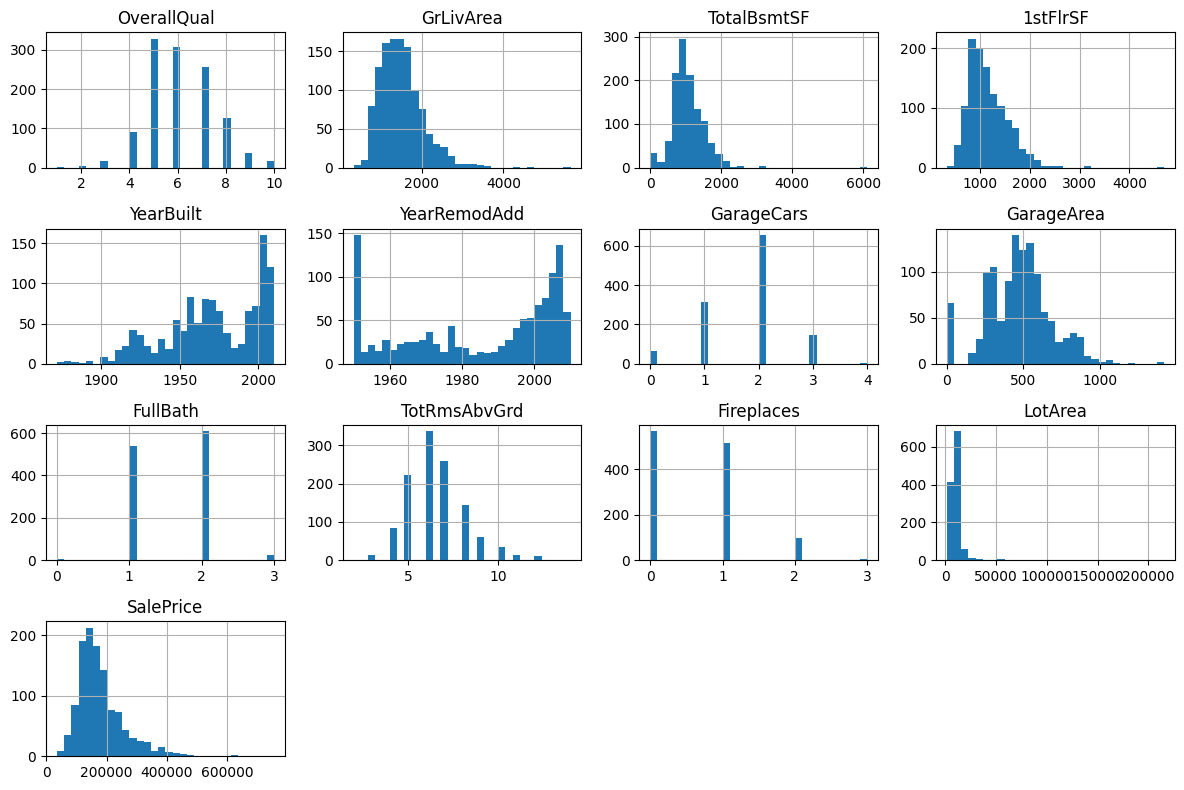

In [82]:
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()

**Categorical Variables**

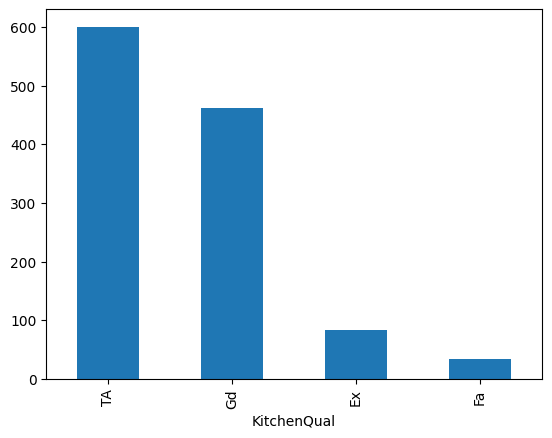

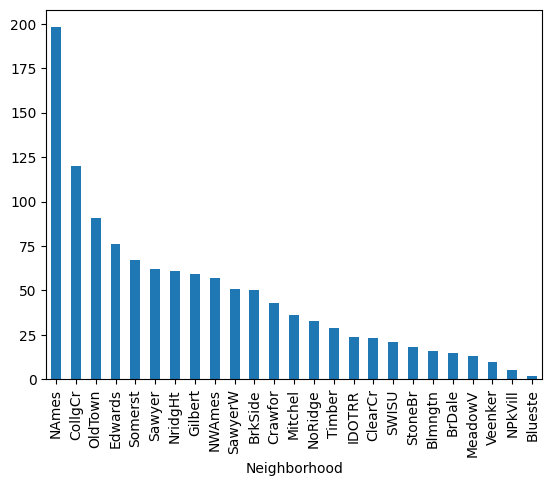

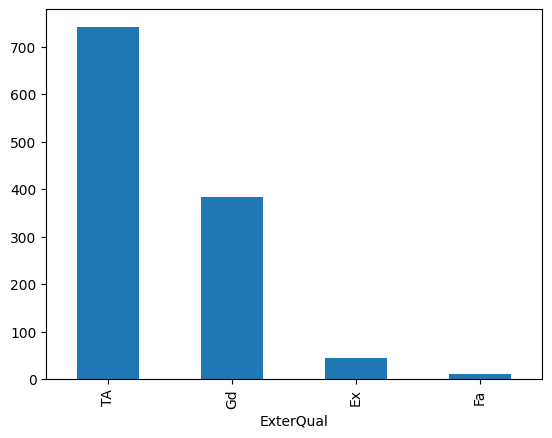

In [95]:
for col in df.select_dtypes(include="object").columns:
    plt.figure()
    df[col].value_counts().plot(kind="bar")

## In-depth analysis

In [100]:
corr_matrix = df.select_dtypes(exclude="object").corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.797688
GrLivArea       0.705777
GarageCars      0.653621
GarageArea      0.639827
TotalBsmtSF     0.613912
1stFlrSF        0.612389
FullBath        0.562188
TotRmsAbvGrd    0.549049
YearBuilt       0.525139
YearRemodAdd    0.508761
Fireplaces      0.475820
LotArea         0.261383
Name: SalePrice, dtype: float64

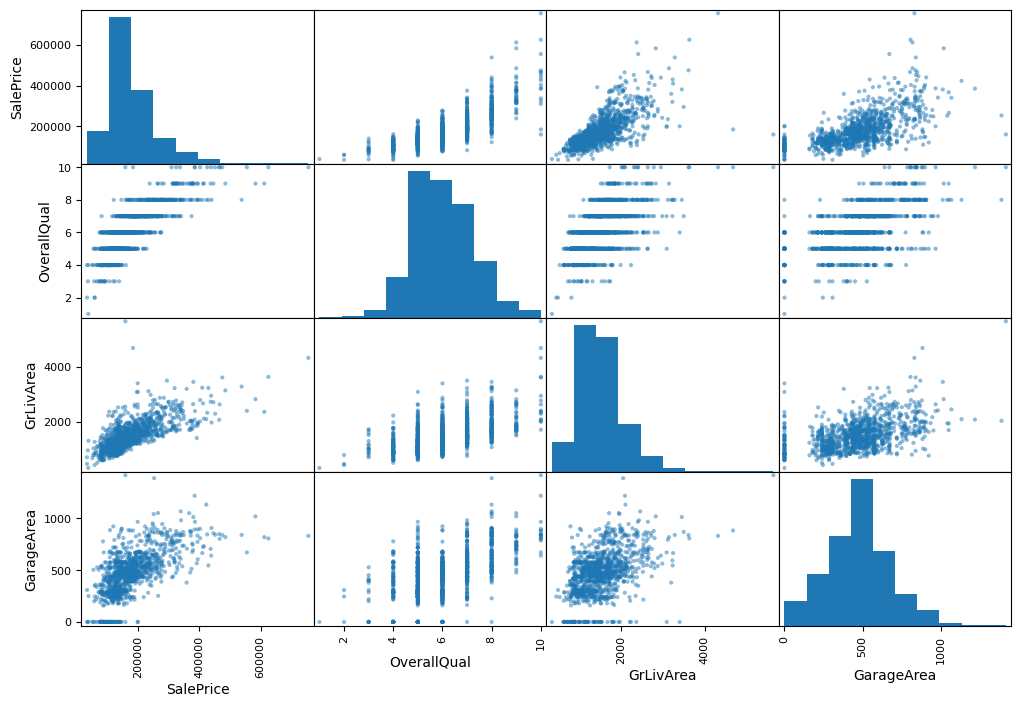

In [105]:
scatter_matrix(df[["SalePrice", "OverallQual", "GrLivArea", "GarageArea"]], figsize=(12, 8))
plt.show()

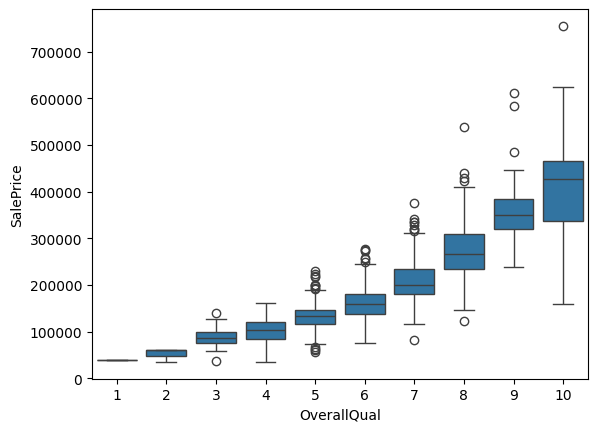

In [110]:
sns.boxplot(data=df, x="OverallQual", y="SalePrice")
plt.show()

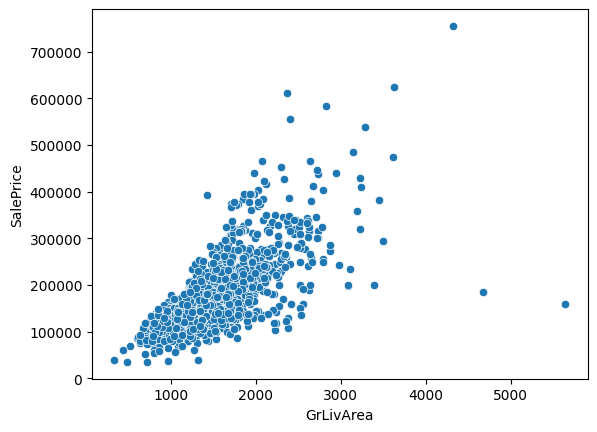

In [109]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")
plt.show()

# III. Pre-processing
## Nettoyage

## Encoding

## Feature Engineering

## Feature Selection

In [156]:
X_train = df[["OverallQual", "GrLivArea", "GarageArea", "1stFlrSF"]]
y_train = df["SalePrice"]

## Normalisation

In [157]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_stand = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

X_train_stand.describe()

,OverallQual,GrLivArea,GarageArea,1stFlrSF
count,1.180000e+03,1.180000e+03,1.180000e+03,1.180000e+03
mean,-2.468835e-16,-2.175284e-16,-9.032323e-18,-2.100015e-16
std,1.000424e+00,1.000424e+00,1.000424e+00,1.000424e+00
min,-3.683588e+00,-2.197344e+00,-2.213997e+00,-2.099543e+00
25%,-7.920970e-01,-7.302999e-01,-7.409732e-01,-7.176645e-01
50%,-6.922425e-02,-1.249569e-01,2.386622e-02,-1.903604e-01
75%,6.536485e-01,5.065833e-01,5.054318e-01,5.793897e-01
max,2.822267e+00,7.735146e+00,4.480708e+00,8.935229e+00


# IV. Modelisation

In [162]:
model = LinearRegression()

model.fit(X_train_stand, y_train)

y_pred = model.predict(X_train_stand)

# V. Evaluation

In [163]:
mean_absolute_error(y_train, y_pred)

25472.19029498556

# VI. Submit Predictions 

In [171]:
X_test = X_test[["OverallQual", "GrLivArea", "GarageArea", "1stFlrSF"]]


X_test_stand = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_stand.describe()



,OverallQual,GrLivArea,GarageArea,1stFlrSF
count,280.000000,280.000000,280.000000,280.000000
mean,0.013390,0.070112,0.099338,-0.007301
std,0.998517,0.907059,1.044511,0.883900
min,-3.683588,-1.564869,-2.213997,-2.003324
25%,-0.792097,-0.585280,-0.419929,-0.686014
50%,-0.069224,0.041583,0.071079,-0.215681
75%,0.653648,0.499566,0.505432,0.547106
max,2.822267,5.553291,4.187992,4.392691


In [174]:
predictions = model.predict(X_test_stand)

In [175]:
submissions = pd.DataFrame()
submissions["SalePrice"] = predictions
submissions.index.name = "ID"
submissions

,SalePrice
ID,
0,160462.610682
1,316501.683892
2,207063.482928
3,181089.781147
4,92561.815623
...,...
275,244910.875516
276,232710.380124
277,213812.337296


In [176]:
submissions.to_csv("submission.csv")